In [1]:
# Import pandas. (after installaion with %pip install pandas)
import pandas as pd 

In [2]:
# Creat an empty data frame
df = pd.DataFrame()
df

""


In [3]:
# step 2 Method 1 insert values to dataframe. NB use list. doesent work with tuples
Students = [['Amaka', 34], ['George', 24], ['Kate', 44]]
df=pd.DataFrame(Students, columns=['Names', 'Scores'])
df

,Names,Scores
0,Amaka,34
1,George,24
2,Kate,44


In [4]:
# second method using a dictionary of lists
students = {'Names': ['Amaka', 'George', 'Emeka'],
             'Scores':[34,24,44]
}
df = pd.DataFrame(students)
df

,Names,Scores
0,Amaka,34
1,George,24
2,Emeka,44


In [5]:
# 3rd method using a list of dictionaries
students = [ {'Nam': 'Amaka','Score': 34},
             {'Nam': 'George','Score': 24},
             {'Nam': 'Kate', 'Score': 44}    
]
df = pd.DataFrame(students)
df

,Nam,Score
0,Amaka,34
1,George,24
2,Kate,44


Series

In [6]:
s= pd.Series([2,3,4,5,6,7])
s
print(s.dtype)

int64


In [7]:
# Data types in Pandas
# int64, float64 , bool, 

# other data types
# Date time
pd.to_datetime('2024.06.08')
pd.to_datetime('2024.06.08')> pd.to_datetime('2024.06.07')


True

In [8]:
# Daytime series
Date_time_series = pd.Series ( [pd.to_datetime('2024.06.08'), pd.to_datetime('2024.06.07')])
Date_time_series


0   2024-06-08
1   2024-06-07
dtype: datetime64[ns]

In [9]:
# timedelta series
Time_delta_series = pd.Series([pd.Timedelta(days=3, hours=3, minutes=34), pd.Timedelta(days=3, hours=4, minutes=14)])
Time_delta_series




0   3 days 03:34:00
1   3 days 04:14:00
dtype: timedelta64[ns]

In [10]:
# Categorical series
Categorical_series = pd.Series(pd.Categorical(['marketing', 'procurement', 'sales']))
Categorical_series

0      marketing
1    procurement
2          sales
dtype: category
Categories (3, object): ['marketing', 'procurement', 'sales']

In [11]:
# note: in to_datetime and timedelta series, all are enclosed in a list while in categoriocal series, all are enclosed in ....
# a tulple with the exception of the 'categories'

In [12]:
# sparse series note: srtructure applies to categorical series.
sparse_series = pd.Series(pd.arrays.SparseArray([2,3,4,5,pd.NA, 8, 7]))
sparse_series
                          

0      2
1      3
2      4
3      5
4    NaN
5      8
6      7
dtype: Sparse[object, nan]

In [13]:
# To check data type
int_series = pd.Series([1, 3, 5, 7])
int_series.dtype

# to change data type
int_series = int_series.astype('Float64')
int_series

0    1.0
1    3.0
2    5.0
3    7.0
dtype: Float64

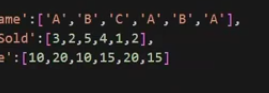

DATA ANALYSIS PROPER

In [14]:
data = { 
    'product name': ['A','B','C','A','B','A'],
    'Qty sold': [3,2,5,4,1,2],
    'Price': [10,20,10,15,20,15]
}

sales_df = pd.DataFrame(data)
sales_df


,product name,Qty sold,Price
0,A,3,10
1,B,2,20
2,C,5,10
3,A,4,15
4,B,1,20
5,A,2,15


In [15]:
# Return a specific column
sales_df['product name']


0    A
1    B
2    C
3    A
4    B
5    A
Name: product name, dtype: object

In [16]:
# Total revenue
sales_df['Total revenue'] = sales_df['Qty sold'] * sales_df['Price']
sales_df

,product name,Qty sold,Price,Total revenue
0,A,3,10,30
1,B,2,20,40
2,C,5,10,50
3,A,4,15,60
4,B,1,20,20
5,A,2,15,30


In [17]:
# to get overall total revenue
print(sum( sales_df['Total revenue']))
sales_df

230


,product name,Qty sold,Price,Total revenue
0,A,3,10,30
1,B,2,20,40
2,C,5,10,50
3,A,4,15,60
4,B,1,20,20
5,A,2,15,30


In [18]:
# Grouping 
# eg Find the total revenue of each of the product name
# note: in grouping, the groupby column is in tuples while the aggregate column is in a list
Total_revenue = pd.DataFrame()
Total_revenue['Group Total revenue'] = sales_df.groupby('product name')['Total revenue'].sum ()
Total_revenue

,Group Total revenue
product name,
A,120
B,60
C,50


In [19]:
# To find total quantity sold
Total_qty = pd.DataFrame()

Total_qty['Total qty sold'] = sales_df.groupby('product name')['Qty sold'].sum ()
Total_qty



,Total qty sold
product name,
A,9
B,3
C,5


In [20]:
# Data selection methods
# indexing method
sales_df['product name'][0:4]

0    A
1    B
2    C
3    A
Name: product name, dtype: object

In [21]:
# to check in 2's eg
sales_df['product name'][::2]

0    A
2    C
4    B
Name: product name, dtype: object

In [22]:
# sum the qty sold for the first two rows
sales_df

,product name,Qty sold,Price,Total revenue
0,A,3,10,30
1,B,2,20,40
2,C,5,10,50
3,A,4,15,60
4,B,1,20,20
5,A,2,15,30


In [23]:
sales_df['Qty sold'][0:2].sum()

5

In [24]:
# Second method INDEX LOCATION (.iloc)
# iloc makes a result of an index show up in data frame
sales_df.iloc[0:3]

,product name,Qty sold,Price,Total revenue
0,A,3,10,30
1,B,2,20,40
2,C,5,10,50


In [25]:
# access a group of colums and rows by labels or a boolean array (.loc)
# example
sales_df.loc[0:3] 

,product name,Qty sold,Price,Total revenue
0,A,3,10,30
1,B,2,20,40
2,C,5,10,50
3,A,4,15,60


In [26]:
sales_df.loc[0:3, ['product name', 'Qty sold']]

,product name,Qty sold
0,A,3
1,B,2
2,C,5
3,A,4


In [27]:
# CONDITIONAL FILTERING
# where total revenue is greater than 30
sales_df[sales_df['Total revenue'] >30]

,product name,Qty sold,Price,Total revenue
1,B,2,20,40
2,C,5,10,50
3,A,4,15,60


In [28]:
# check 
# for specific product name
sales_df[sales_df['product name'] == 'A']

,product name,Qty sold,Price,Total revenue
0,A,3,10,30
3,A,4,15,60
5,A,2,15,30


# Pandas Operators
## Pandas Operators
Data Loading and Exploration:

- head(): Shows the first few rows of a DataFrame
- tail(): Shows the last few rows of a DataFrame
- describe(): Generates summary statistics for each column (mean, standard deviation, etc.)
- info(): Displays information about the DataFrame, including data types and memory usage

Data Analysis:

- sum(): Calculates the sum of a Series or DataFrame
- mean(): Calculates the mean of a Series or DataFrame
- median(): Calculates the median of a Series or DataFrame
- std(): Calculates the standard deviation of a Series or DataFrame
- var(): Calculates the variance of a Series or DataFrame

In [29]:
rev_data = {
    'ProductID': ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10'],
    'Rating': [5,3,2,1,4,3,2,4,6,1]
}

rev_df = pd.DataFrame(rev_data)
rev_df 

,ProductID,Rating
0,P1,5
1,P2,3
2,P3,2
3,P4,1
4,P5,4
5,P6,3
6,P7,2
7,P8,4
8,P9,6
9,P10,1


In [30]:
rev_df.describe()

,Rating
count,10.00000
mean,3.10000
std,1.66333
min,1.00000
25%,2.00000
50%,3.00000
75%,4.00000
max,6.00000


In [31]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  10 non-null     object
 1   Rating     10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [32]:
rev_df.head()

,ProductID,Rating
0,P1,5
1,P2,3
2,P3,2
3,P4,1
4,P5,4


In [33]:
# Sum
rev_df['Rating'].sum()

31

In [34]:
# to export to excel use: %pip install openpyxl
#

In [35]:
# syntax
Annual.to_excel('Annual.xlsx', sheet_name= 'annual one', index=False)

NameError: name 'Annual' is not defined

In [37]:
Samples_sales = pd.read_csv('100 Sales Records.csv')
Samples_sales

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


**Find the following**


- a. total revenue by each item type
- b. Overall total revenue
- c. total cost by each item type 
- d. overall cost
- e. total profit by each item type
- f. overall total profit.



In [38]:
Samples_sales['Total I Revenue'] = Samples_sales['Units Sold'] * Samples_sales['Unit Price'] 
Samples_sales



,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total I Revenue
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,576782.80
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,3296425.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,97040.64
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,58471.11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,228779.10
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,471336.91


In [ ]:
print(sum(Samples_sales['Total I Revenue']))

137348768.31


In [ ]:
Total_I_Revenue = 137348768.31

Revenue = pd.DataFrame([{'Total I Revenue':Total_I_Revenue }])
Revenue



,Total I Revenue
0,1.373488e+08


In [42]:
Total = pd.DataFrame()
Total['Revenue by item'] = Samples_sales.groupby('Item Type') ['Total I Revenue'].sum()
Total

,Revenue by item
Item Type,
Baby Food,10350327.60
Beverages,2690794.60
Cereal,5322898.90
Clothes,7787292.80
Cosmetics,36601509.60
Fruits,466481.34
Household,29889712.29
Meat,4503675.75
Office Supplies,30585380.07


In [45]:
# Cost by each item
Samples_sales['Total item cost'] = Samples_sales['Units Sold'] * Samples_sales['Unit Cost'] 
Samples_sales


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total I Revenue,Total item cost
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2533654.00,1582243.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,576782.80,328376.44
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,1158502.59,933903.84
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,56065.84
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,3296425.02,2657347.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,97040.64,31825.92
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,58471.11,43367.64
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,228779.10,135031.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,471336.91,326815.89


In [46]:

Total_Overall_cost = Samples_sales['Total item cost'].sum()
Total_Overall_cost

93180569.91000001

In [48]:
pd.DataFrame([{'Overall Cost': Total_Overall_cost}])


,Overall Cost
0,93180569.91


In [49]:
Cost = pd.DataFrame()
Cost['Group total cost'] = Samples_sales.groupby('Item Type')['Total item cost'].sum()
Cost

,Group total cost
Item Type,
Baby Food,6463683.90
Beverages,1802747.32
Cereal,3030455.47
Clothes,2553958.40
Cosmetics,22045460.94
Fruits,345986.16
Household,22477106.58
Meat,3893065.75
Office Supplies,24655796.32


In [50]:

Samples_sales['Profit'] = Samples_sales['Total Revenue'] - Samples_sales['Total Cost']
Samples_sales

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total I Revenue,Total item cost,Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,471336.91,326815.89,144521.02


In [51]:

Over_profit = Samples_sales['Profit'].sum()
Over_profit

44168198.39999999

In [52]:
pd.DataFrame([{'Total item Profit': Over_profit}])

,Total item Profit
0,44168198.4


In [53]:
Summation = pd.DataFrame()
Summation['Item profit'] = Samples_sales.groupby('Item Type')['Profit'].sum()
Summation

,Item profit
Item Type,
Baby Food,3886643.70
Beverages,888047.28
Cereal,2292443.43
Clothes,5233334.40
Cosmetics,14556048.66
Fruits,120495.18
Household,7412605.71
Meat,610610.00
Office Supplies,5929583.75


In [ ]:
# .apply() function 
def square(x):
    return x*x

Summation['profitsquared'] = Summation['Item profit'].apply(square)
Summation

,Item profit,profitsquared
Item Type,,
Baby Food,3886643.70,1.510600e+13
Beverages,888047.28,7.886280e+11
Cereal,2292443.43,5.255297e+12
Clothes,5233334.40,2.738779e+13
Cosmetics,14556048.66,2.118786e+14
Fruits,120495.18,1.451909e+10
Household,7412605.71,5.494672e+13
Meat,610610.00,3.728446e+11
Office Supplies,5929583.75,3.515996e+13


In [56]:
def add_prefix(x):
    return f" Gigiya {x}"
Summation["Brand Name"] = Summation["Item profit"].apply(add_prefix)
Summation
#  Cannot be done using a key variable especially after a groupby. (didt work when i tried using Item Type)

,Item profit,Brand Name
Item Type,,
Baby Food,3886643.70,Gigiya 3886643.7
Beverages,888047.28,Gigiya 888047.28
Cereal,2292443.43,Gigiya 2292443.43
Clothes,5233334.40,Gigiya 5233334.399999999
Cosmetics,14556048.66,Gigiya 14556048.66
Fruits,120495.18,Gigiya 120495.18000000001
Household,7412605.71,Gigiya 7412605.71
Meat,610610.00,Gigiya 610610.0
Office Supplies,5929583.75,Gigiya 5929583.75


In [60]:
# Filtering 

def keep_young(x):
    return x < 1000000

filter = Summation[Summation["Item profit"].apply(keep_young)]
filter
# Note the list covers the entire syntax
# Similar to Conditional filtering 


,Item profit,Brand Name
Item Type,,
Beverages,888047.28,Gigiya 888047.28
Fruits,120495.18,Gigiya 120495.18000000001
Meat,610610.00,Gigiya 610610.0
Snacks,751944.18,Gigiya 751944.1799999999
